In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
%matplotlib inline
import sys
import os
import os.path
import pickle

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib
from sklearn.manifold import TSNE

from matplotlib import pyplot as plt

In [2]:
X = pd.read_csv('data/cox2/cox2_matrix_alphabet_NNdbr_UpTo5chains.csv', sep = ',')
Y = pd.read_csv('data/cox2/cox2_y.csv', sep = ',', usecols=[0])
header =X.columns
X = X.to_numpy()
Y = Y.to_numpy()

yl = list()
for i in range(Y.shape[0]):
    yl.append(Y[i][0])

Data = np.column_stack((X, Y[:, 0])) 
#data_train, data_test= train_test_split(Data, test_size = 0.5, random_state = 3)

#train_x = data_train[:, 0:274]
#train_y = data_train[:, 274]
#test_x = data_test[:, 0:274]
#test_y = data_test[:, 274]
data = X
y = np.array(yl) 


In [3]:
dbscan = DBSCAN(eps=0.9, min_samples=10)

In [4]:
dbscan.fit(Data)
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

NameError: name 'c1' is not defined

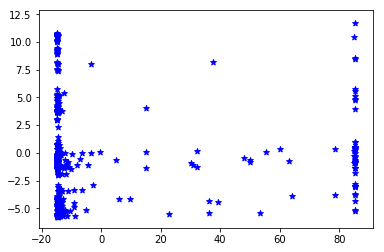

In [27]:

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(Data)
pca_2d = pca.transform(Data)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()